# VISUALIZATION

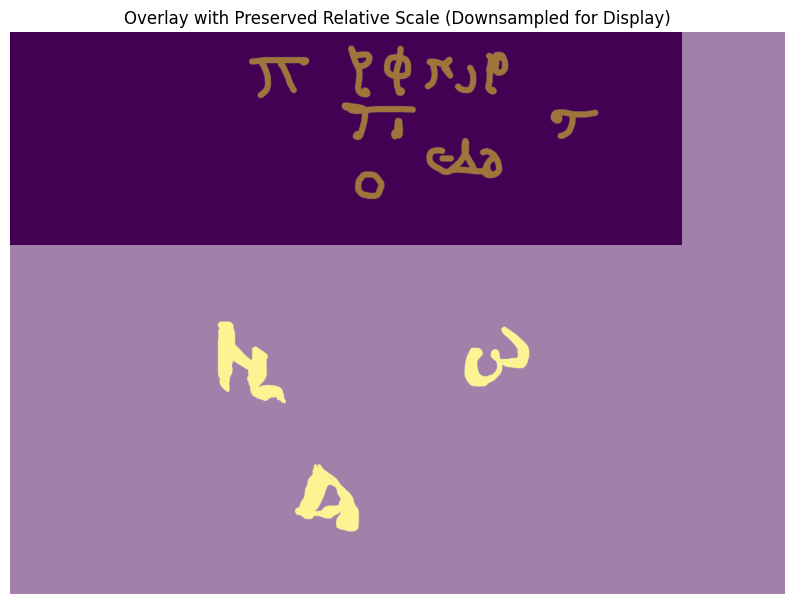

In [12]:
import os
import sys
sys.path.append(os.path.abspath( '..'))
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Image.MAX_IMAGE_PIXELS = None

# === Load images ===
img1_path = os.path.join('../train_scrolls/frag1/frag1_inklabels.png')
img2_path = os.path.join('../train_scrolls/20231210132040/20231210132040_inklabels.png')
img3_path = os.path.join('../train_scrolls/20231215151901/20231215151901_inklabels.png')

img1 = Image.open(img1_path).convert("L")
img2 = Image.open(img2_path).convert("L")
img3 = Image.open(img3_path).convert("L")


# === Resize img1 by 1/2.44 (real scale adjustment) ===
scale_factor_img1 = 1 / 2.44
img1_real = img1.resize(
    (int(img1.width * scale_factor_img1), int(img1.height * scale_factor_img1))
)

# === Optional: display downscale factor (for visualization only) ===
display_scale = 0.25  # adjust as needed to fit screen
img1_display = img1_real.resize(
    (int(img1_real.width * display_scale), int(img1_real.height * display_scale))
)
img2_display = img2.resize(
    (int(img2.width * display_scale), int(img2.height * display_scale))
)
img3_display = img3.resize( (int(img3.width * display_scale), int(img3.height * display_scale)))

# === Convert to numpy arrays ===
img1_array = np.array(img1_display)
img3_array = np.array(img3_display)
img2_array = np.array(img2_display)

# === Overlay ===
plt.figure(figsize=(10, 10))
# plt.imshow(img1_array, cmap='gray')
plt.imshow(img3_array)
plt.imshow(img2_array, alpha=0.5)  # Adjust alpha as needed
plt.axis('off')
plt.title('Overlay with Preserved Relative Scale (Downsampled for Display)')
plt.show()

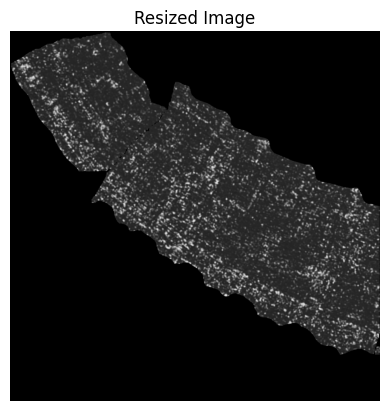

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Allow very large images
Image.MAX_IMAGE_PIXELS = None

# Load the image in grayscale
img1 = Image.open("wandb/run-20250721_182903-9lgzto39/files/media/images/masks_5941_66d1f94a422a243997c2.png").convert("L")

# Resize: downscale while keeping aspect ratio
# For example, resize to max width or height of 1024 pixels
max_size = (1024, 1024)
img1_resized = img1.resize(max_size, Image.LANCZOS)

# Display the resized image
plt.imshow(img1_resized, cmap='gray')
plt.title("Resized Image")
plt.axis('off')
plt.show()


# CROP

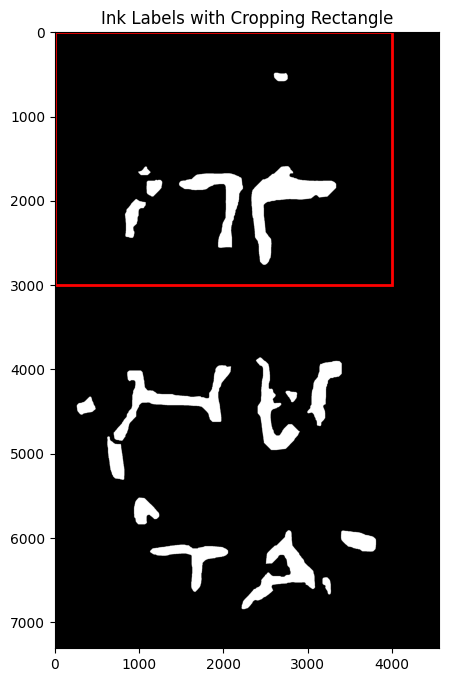

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/frag5'  # Path to frag1
RECT = (0,00, 4000, 3000)        # (x, y, width, height)
# ============================
inklabel_path = os.path.join(FRAG_PATH, 'frag5_inklabels.png')
img = Image.open(inklabel_path)

# Plot the image with rectangle
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img, cmap='gray')
x, y, w, h = RECT
rect_patch = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect_patch)
ax.set_title("Ink Labels with Cropping Rectangle")
plt.show()

In [10]:
import os
from PIL import Image
from tqdm import tqdm
# Image.MAX_IMAGE_PIXELS = None  # Avoid DecompressionBombWarning

import numpy as np

# ==== CONFIGURABLE PART ====
FRAG_PATH = '../train_scrolls/frag1'  # Path to frag1
RECT = (0,0, 4000, 4000)        # (x, y, width, height)
FRAG_NAME = FRAG_PATH.split("/")[-1]
# ============================
# Automatically extract fragment name (e.g., "frag5")
frag_name = os.path.basename(FRAG_PATH.rstrip('/'))

LAYER_DIR = os.path.join(FRAG_PATH, 'layers')
# RECT_OUT = os.path.join('train_scrolls', 'rect0')
# REMAINING_OUT = os.path.join('train_scrolls', 'remaining0')
# LAYER_DIR = "train_scrolls/"
RECT_OUT = os.path.join("../train_scrolls", 'rect1')
REMAINING_OUT = os.path.join("../train_scrolls", 'remaining1')
# print(LAYER_DIR)
# print(RECT_OUT)
# print(REMAINING_OUT)
# Subfolders for tiff output
RECT_LAYER_OUT = os.path.join(RECT_OUT, 'layers')
REMAINING_LAYER_OUT = os.path.join(REMAINING_OUT, 'layers')

# print(RECT_LAYER_OUT)
# print(REMAINING_LAYER_OUT)

# Create all necessary directories
os.makedirs(RECT_LAYER_OUT, exist_ok=True)
os.makedirs(REMAINING_LAYER_OUT, exist_ok=True)
# os.makedirs(RECT_OUT, exist_ok=True)
# os.makedirs(REMAINING_OUT, exist_ok=True)

def split_image(img_path, rect, out_name, out_subdir=None):
    x, y, w, h = rect
    img = Image.open(img_path)
    img_np = np.array(img)
    # Crop rectangle
    rect_crop = img.crop((x, y, x + w, y + h))
    rect_crop.save(os.path.join(out_subdir[0], out_name))
    
    # REMAINING
    img = np.array(img)
    if img_path.lower().endswith(('.png')):
        img = img*255
    img[y:y+h, x:x+w] = 0  # Zero only this region
    # 3. Save the masked image
    img = Image.fromarray(img)  
    img.save(os.path.join(out_subdir[1], out_name))

# Process all TIFF layers
for fname in tqdm(os.listdir(LAYER_DIR)):
    if fname.lower().endswith(('.tiff', '.tif',".png")):
        fpath = os.path.join(LAYER_DIR, fname)
        split_image(fpath, RECT, fname, (RECT_LAYER_OUT, REMAINING_LAYER_OUT))

# Process inklabels and mask — keep them in top-level output folders
for suffix in ['mask.png','inklabels.png']:
    fname = f"{frag_name}_{suffix}"
    fpath = os.path.join(FRAG_PATH, fname)
    if os.path.exists(fpath):
        split_image(fpath, RECT, fname, (RECT_OUT, REMAINING_OUT))

print(f"Cropping complete for {frag_name}.")

100%|██████████| 73/73 [00:59<00:00,  1.23it/s]


Cropping complete for frag1.


(10485, 3153)


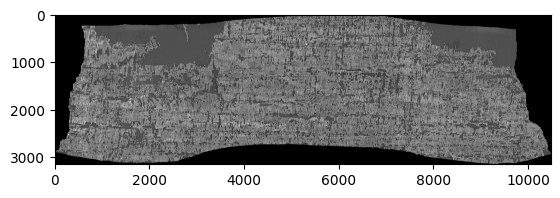

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('../train_scrolls/20231215151901/layers/32.tif')
print(img.size)
plt.imshow(img, cmap='gray')

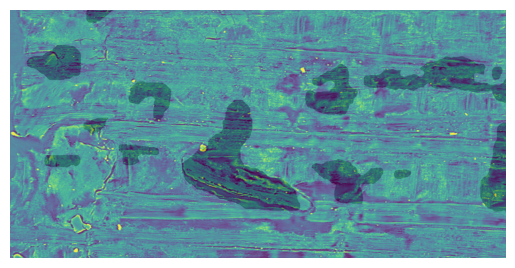

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

# Load images
base_img = Image.open('train_scrolls/rect11/layers/20.tif')
mask_img = Image.open('train_scrolls/rect11/rect11_inklabels.png')

# Show overlay
plt.imshow(base_img)     # base image in grayscale
plt.imshow(mask_img.convert('L'), cmap='Reds', alpha=0.2)  # overlay mask in red
plt.axis('off')
plt.show()


# METRICS


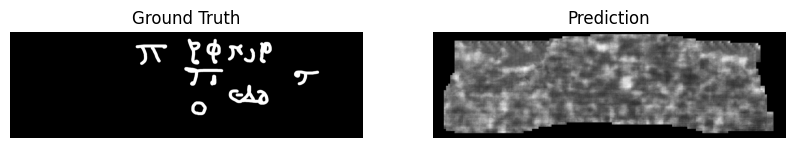

{'Error': "Target is multiclass but average='binary'. Please choose another "
          "average setting, one of [None, 'micro', 'macro', 'weighted']."}


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, precision_score, recall_score

def resize_image(image, target_shape):
    return cv2.resize(image, (target_shape[1], target_shape[0]), interpolation=cv2.INTER_NEAREST)

def compute_metrics(result_path, ground_truth_path, threshold=0.5):
    # Load images in grayscale
    result = cv2.imread(result_path, cv2.IMREAD_GRAYSCALE)
    ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize ground truth to match result
    ground_truth = resize_image(ground_truth, result.shape)
    try:
        # Normalize to binary using a variable threshold (0 to 1 range)
        threshold_value = int(threshold * 255)
        # result = (result > threshold_value).astype(np.uint8)
        ground_truth = (ground_truth > threshold_value).astype(np.uint8)
        
        # Compute pixel accuracy
        pixel_accuracy = accuracy_score(ground_truth.flatten(), result.flatten())
        
        # Compute precision and recall
        precision = precision_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        recall = recall_score(ground_truth.flatten(), result.flatten(), zero_division=1)
        
        # Compute IoU
        intersection = np.logical_and(result, ground_truth).sum()
        union = np.logical_or(result, ground_truth).sum()
        iou = intersection / union if union != 0 else 0
        
        # Compute Dice coefficient (F1-score for segmentation)
        dice = (2 * intersection) / (result.sum() + ground_truth.sum()) if (result.sum() + ground_truth.sum()) != 0 else 0
        
        # Compute AUPRC
        precision_curve, recall_curve, _ = precision_recall_curve(ground_truth.flatten(), result.flatten())
        auprc = auc(recall_curve, precision_curve)
        
        metrics = {
            "Pixel Accuracy": pixel_accuracy,
            "Precision": precision,
            "Recall": recall,
            "IoU": iou,
            "Dice Coefficient": dice,
            "AUPRC": auprc
        }
    except Exception as e:
        metrics = {
            "Error": str(e)
        }
    
    # Display images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("Ground Truth")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title("Prediction")
    plt.axis("off")
    
    plt.show()
    
    return metrics

# Example usage
result_path = "../wandb/run-20250730_235123-0du3ircv/files/media/images/masks_72_53dfea2d9e0ad85f9c16.png"
ground_truth_path = "../train_scrolls/20231215151901/20231215151901_inklabels.png"
threshold = 0.6 # Adjustable threshold between 0 and 1
metrics = compute_metrics(result_path, ground_truth_path, threshold)
pprint(metrics)

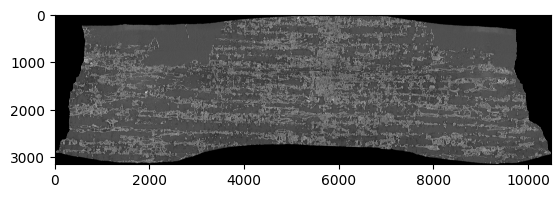

In [20]:
import cv2
# Load image
img = cv2.imread('../train_scrolls/20231215151901/layers/20.tif')

plt.imshow(img)

# RESIZE

(8790, 12122)
(8790, 12122)


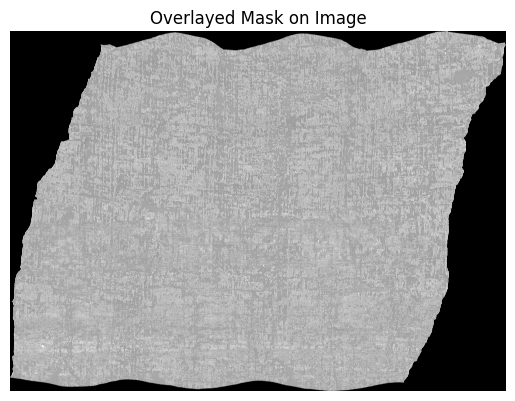

In [62]:
import cv2
import matplotlib.pyplot as plt

# Load grayscale mask
mask = cv2.imread('../train_scrolls/s4/s4_mask.png', 0)  # '0' loads as grayscale
print(mask.shape)
# mask = cv2.resize(mask, (mask.shape[1]//4, mask.shape[0]//4), interpolation=cv2.INTER_AREA)
# Compute padding needed to make dimensions divisible by 256
# pad0 = (256 - mask.shape[0] % 256) 
# pad1 = (256 - mask.shape[1] % 256)

# Apply padding — for 2D array, just two dimensions
# mask = np.pad(mask, [(0, pad0), (0, pad1)], constant_values=0)

# Load background (layer)
background = cv2.imread('../train_scrolls/s4/layers/32.tif',0)
print(background.shape)

# Resize mask to match background
mask_resized = cv2.resize(mask, (background.shape[1], background.shape[0]))

# Overlay with transparency
alpha = .5  # transparency level (0 = only background, 1 = only mask)
overlay = cv2.addWeighted(background, 1 - alpha, mask_resized, alpha, 0)

# Convert BGR to RGB for matplotlib
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

cv2.imwrite('overlayed_mask.png', overlay)  # Save the overlayed image

# Display the overlay
plt.imshow(overlay_rgb)
plt.axis('off')
plt.title('Overlayed Mask on Image')
plt.show()

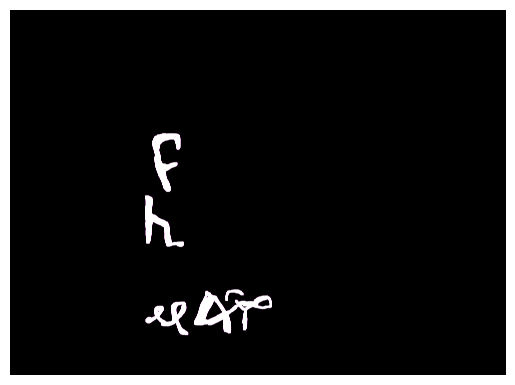

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread('../wandb/run-20250731_153934-61qhh0ow/files/media/images/masks_784_4145bd45306d89c6133e.png')

img2 = cv2.imread('../train_scrolls/s4/layers/40.tif')

# Pad img2 with 256 pixels on all sides
pad_width = 256
img2_padded = cv2.copyMakeBorder(
    img2,
    pad_width, pad_width, pad_width, pad_width,  # top, bottom, left, right
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]  # black padding
)

# Resize padded img2 to match shape of img
img2_resized = cv2.resize(img, (img2_padded.shape[1], img2_padded.shape[0]))

# Convert to RGB for matplotlib
img_rgb = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

# Save and display
cv2.imwrite('img2_padded_resized.png', img2_resized)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img = cv2.imread('img2_padded_resized.png')
img2 = cv2.imread('resized_2.png')

# Pad img2 with 256 pixels on all sides
pad_width = 256
img2_padded = cv2.copyMakeBorder(
    img2,
    pad_width, pad_width, pad_width, pad_width,
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]
)

# Resize padded img2 to match img
img2_resized = cv2.resize(img2_padded, (img.shape[1], img.shape[0]))

# Blend the images: 70% of img + 30% of img2
overlay = cv2.addWeighted(img, 0.7, img2_resized, 0.3, 0)

# Convert BGR to RGB for display
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# Save and display
cv2.imwrite('overlay.png', overlay)

plt.imshow(overlay_rgb)
plt.axis('off')
plt.show()


[ WARN:0@8274.198] global loadsave.cpp:268 findDecoder imread_('img2_padded_resized.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

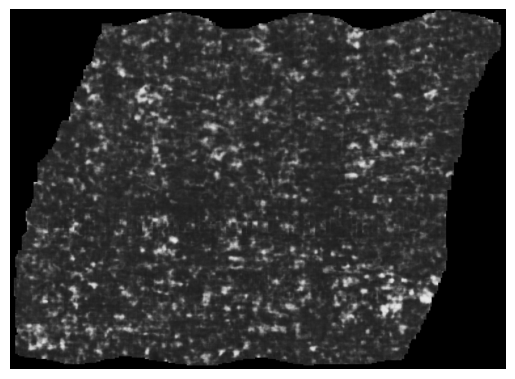

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('wandb/run-20250602_091148-quv97k49/files/media/images/masks_794_45dac4174a9a65a6ddc1.png')

# Resize image to half the original size
img_resized = cv2.resize(img, (img.shape[1] // 4, img.shape[0] // 4))
cv2.imwrite('resized.png', img_resized)

# Convert BGR (OpenCV default) to RGB for proper display with matplotlib
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


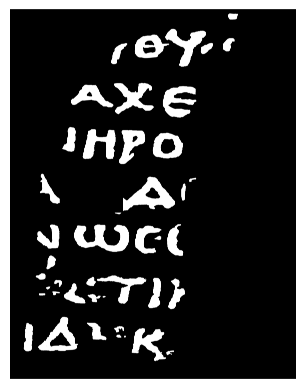

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load source and target images
source_img = cv2.imread('0000002.png')
target_img = cv2.imread('train_scrolls/remaining11/remaining11_inklabels.png')

# Get dimensions of the target image
target_height, target_width = target_img.shape[:2]

# Resize source image to match target image size
resized_img = cv2.resize(source_img, (target_width, target_height))

# Optional: Save the resized image
cv2.imwrite('resized_output_path.png', resized_img)

# Convert BGR to RGB for matplotlib display
resized_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display resized image
plt.imshow(resized_rgb)
plt.axis('off')
plt.show()


# PSEUDO

In [2]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('wandb/run-20250721_200047-eox9zgsu/files/media/images/masks_1656_754a2307e92c2b0229ab.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('pseudo.png', image)

# Threshold to binarize
threshold_value = 90
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Remove small objects using connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Set a minimum area threshold (e.g., 500 pixels)
min_area = 40000

# Create a blank image to store filtered objects
filtered_image = np.zeros_like(binary_image)

# Keep only large components
for i in range(1, num_labels):  # Skip background (label 0)
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= min_area:
        filtered_image[labels == i] = 255
        
# Morphological erosion
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))  # Shape and size of erosion
eroded_image = cv2.erode(filtered_image, kernel, iterations=1)
# Optional: Save the resized image
# cv2.imwrite('errrrrr.png', eroded_image)
# Load second image (original grayscale again if needed)
original = image.copy()  # already loaded above, original grayscale

# Create soft label mask
soft_mask = np.zeros_like(original, dtype=np.uint8)

soft_mask[eroded_image == 255] = 255
# # Assign strong foreground (from eroded binary)
# soft_mask[eroded_image == 255] = 255.0

# # Assign strong background (only where not already labeled as 255)
# soft_mask[(original < 0) & (eroded_image != 255)] = 0.0

# # Assign 0.5 to the rest (uncertain area)
# soft_mask[(soft_mask != 255.0) & (soft_mask != 0.0)] = 10
# Assign strong foreground

# Assign uncertain (middle) to pixels that were above threshold in original but not part of final eroded blobs
uncertain_mask = (original >= 30) & (eroded_image != 255)
soft_mask[uncertain_mask] = 127
cv2.imwrite("final_soft_mask_visual.png", soft_mask)


# # Everything else is strong background
# soft_mask[(soft_mask != 255.0) & (soft_mask != 0.5)] = 0.0
# # Optional: Save visual version
# visual_mask = np.zeros_like(original, dtype=np.uint8)
# visual_mask[soft_mask == 255.0] = 255
# visual_mask[soft_mask == 10] = 127
# visual_mask[soft_mask == 0.0] = 0
# cv2.imwrite("final_soft_mask_visual.png", visual_mask)


True

# MATCH HISTOGRAMS

In [ ]:
import numpy as np
import tifffile
from skimage.exposure import match_histograms
import os

# Load 3D volume from TIFF stack
def load_tiff_stack(folder_path):
    # Assuming folder_path contains slices named in order or just one multi-page TIFF
    # If multi-page TIFF:
    volume = tifffile.imread(folder_path)
    return volume

# Save 3D volume as TIFF stack (multi-page TIFF)
def save_tiff_stack(volume, out_path):
    tifffile.imwrite(out_path, volume.astype(np.uint16))  # change dtype as needed

# Match histogram for the whole 3D volume
def match_3d_histogram(source, reference):
    matched = match_histograms(source, reference, channel_axis=None)
    return matched

# Paths to your TIFF stacks (multi-page TIFF files or folders with slices)
ref_tiff_path = './train_scrolls/frag5/layers/30.tif'
src_tiff_path = './train_scrolls/frag1/layers/30.tif'
out_tiff_path = 'matched_54kv_to_73kv.tif'

# Load volumes
ref_volume = load_tiff_stack(ref_tiff_path)
src_volume = load_tiff_stack(src_tiff_path)

# Check shapes are the same or resize if necessary
print(f'Reference volume shape: {ref_volume.shape}')
print(f'Source volume shape: {src_volume.shape}')

# If shapes differ, you might want to resize source to ref or vice versa before matching

# Match histograms
matched_volume = match_3d_histogram(src_volume, ref_volume)

# Save matched volume
save_tiff_stack(matched_volume, out_tiff_path)

print(f'Matched volume saved to {out_tiff_path}')


Reference volume shape: (7309, 4560)
Source volume shape: (8181, 6330)
Matched volume saved to matched_54kv_to_73kv.tif


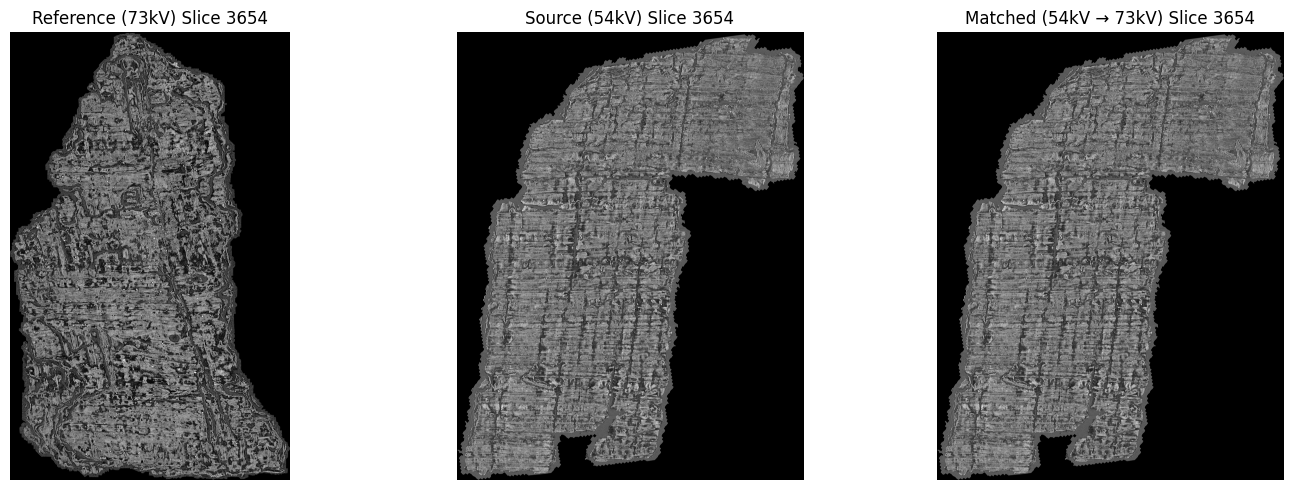

In [ ]:
import matplotlib.pyplot as plt

def plot_slices_side_by_side(ref_vol, src_vol, matched_vol, slice_idx=None):
    # If no slice index specified, use the middle slice
    if slice_idx is None:
        slice_idx = ref_vol.shape[0] // 2
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot reference slice
    axes[0].imshow(ref_vol, cmap='gray')
    axes[0].set_title(f'Reference (73kV) Slice {slice_idx}')
    axes[0].axis('off')
    
    # Plot source slice
    axes[1].imshow(src_vol, cmap='gray')
    axes[1].set_title(f'Source (54kV) Slice {slice_idx}')
    axes[1].axis('off')
    
    # Plot matched slice
    axes[2].imshow(matched_vol, cmap='gray')
    axes[2].set_title(f'Matched (54kV → 73kV) Slice {slice_idx}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_slices_side_by_side(ref_volume, src_volume, matched_volume)


In [ ]:
import numpy as np
import tifffile
from skimage.exposure import match_histograms
import os

# Load all TIFF slices from a folder into a 3D numpy array
def load_tiff_folder(folder_path):
    # List all TIFF files, sorted by filename (assumes correct slice order)
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    volume_slices = []
    for f in files:
        slice_img = tifffile.imread(os.path.join(folder_path, f))
        volume_slices.append(slice_img)
    volume = np.stack(volume_slices, axis=0)
    return volume, files  # returning filenames to reuse for saving

# Save 3D numpy array as individual TIFF slices in output folder
def save_tiff_folder(volume, filenames, out_folder):
    os.makedirs(out_folder, exist_ok=True)
    for i, filename in enumerate(filenames):
        out_path = os.path.join(out_folder, filename)
        tifffile.imwrite(out_path, volume[i].astype(np.uint16))  # adjust dtype if needed

# Histogram match slice-by-slice
def match_histograms_slicewise(src_vol, ref_vol):
    matched_slices = []
    for i in range(src_vol.shape[0]):
        matched = match_histograms(src_vol[i], ref_vol[i], channel_axis=None)
        matched_slices.append(matched)
    matched_volume = np.stack(matched_slices, axis=0)
    return matched_volume

# Paths to folders containing TIFF slices
ref_folder = './train_scrolls/frag1/layers/'
src_folder = './train_scrolls/frag5/layers/'
out_folder = './matched_54kv_to_73kv_slices'

# Load volumes and get filenames
ref_volume, ref_files = load_tiff_folder(ref_folder)
src_volume, src_files = load_tiff_folder(src_folder)

# Sanity check: number of slices and file names should match
# assert ref_volume.shape == src_volume.shape, "Source and Reference volumes must have the same shape!"
assert ref_files == src_files, "Filenames in source and reference folders should match and be in the same order!"

print(f'Volume shape: {ref_volume.shape}')
print(f'Number of slices: {len(ref_files)}')

# Match histograms slice-by-slice
matched_volume = match_histograms_slicewise(src_volume, ref_volume)

# Save matched slices
save_tiff_folder(matched_volume, src_files, out_folder)

print(f'Matched slices saved to folder: {out_folder}')


Volume shape: (65, 8181, 6330)
Number of slices: 65
Matched slices saved to folder: ./matched_54kv_to_73kv_slices


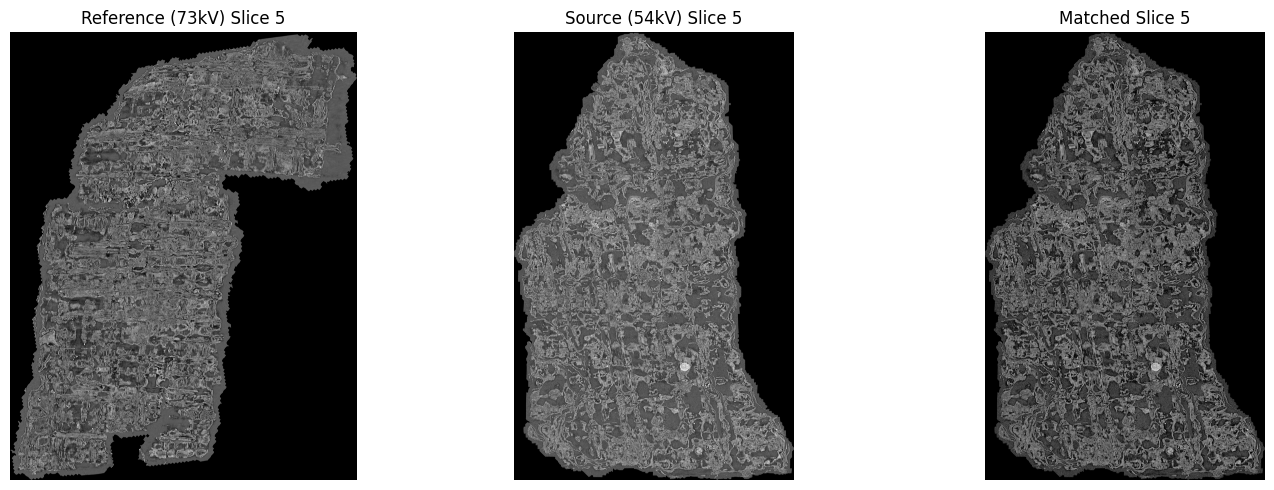

In [ ]:
import matplotlib.pyplot as plt
import tifffile

# Load volumes (assuming multi-page TIFF or stacks already loaded)
ref_folder = './train_scrolls/frag1/layers'
src_folder = './train_scrolls/frag5/layers'
matched_folder = './matched_54kv_to_73kv_slices'

def load_tiff_slice(folder_path, slice_idx=0):
    # Load the slice-th TIFF file (assuming sorted filenames)
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.tif') or f.endswith('.tiff')])
    slice_img = tifffile.imread(os.path.join(folder_path, files[slice_idx]))
    return slice_img

slice_idx = 5  # change this index to view other slices

# Load slices
ref_slice = load_tiff_slice(ref_folder, slice_idx)
src_slice = load_tiff_slice(src_folder, slice_idx)
matched_slice = load_tiff_slice(matched_folder, slice_idx)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ref_slice, cmap='gray')
axes[0].set_title(f'Reference (73kV) Slice {slice_idx}')
axes[0].axis('off')

axes[1].imshow(src_slice, cmap='gray')
axes[1].set_title(f'Source (54kV) Slice {slice_idx}')
axes[1].axis('off')

axes[2].imshow(matched_slice, cmap='gray')
axes[2].set_title(f'Matched Slice {slice_idx}')
axes[2].axis('off')

plt.tight_layout()
plt.show()

(6957, 7348, 3)


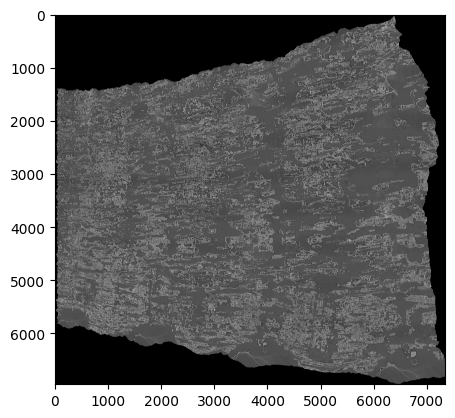

In [10]:
import cv2
# Load image
img = cv2.imread('train_scrolls/1flatboi/layers/50.jpg')
print(img.shape)
plt.imshow(img)

(8181, 6330, 3)


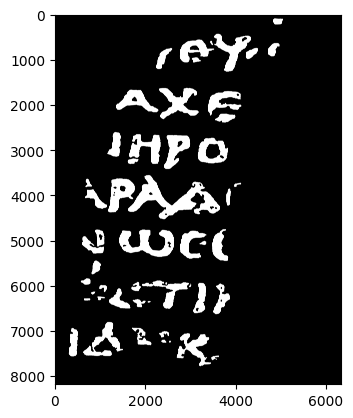

In [ ]:
import cv2
# Load image
img = cv2.imread('train_scrolls/frag1/frag1_inklabels.png')
print(img.shape)
plt.imshow(img)

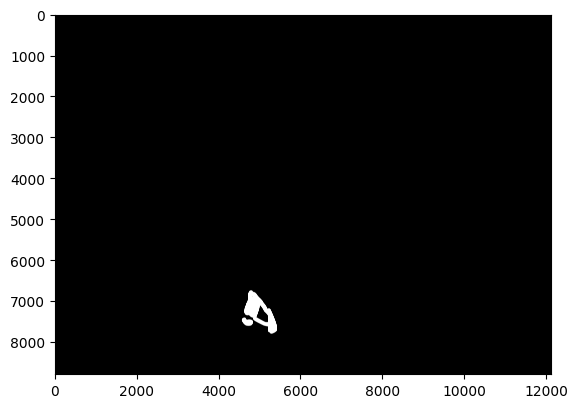

In [ ]:
import cv2
# Load image
img = cv2.imread('train_scrolls/20231210132040/20231210132040_inklabels.png')

plt.imshow(img)

In [ ]:
(2*25/2)*3

75.0

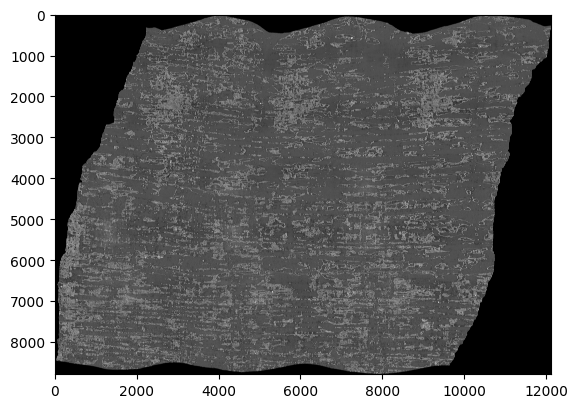

In [ ]:
import cv2
# Load image
img = cv2.imread('train_scrolls/20231210132040/layers/15.tif')

plt.imshow(img)

# AVERAGE

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

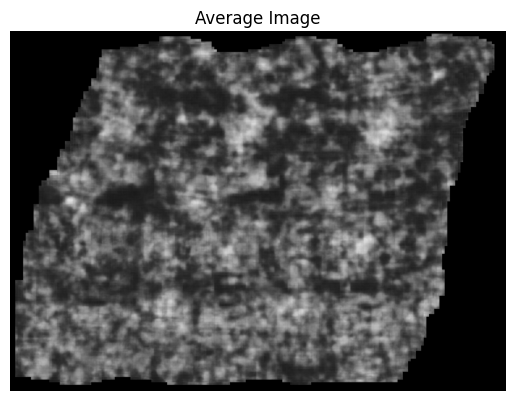

In [ ]:
image_dir = "wandb/run-20250526_164841-924i2wc3/files/media/images"
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]

images = []
for path in image_paths:
    img = Image.open(path).convert("RGB")  # or "L" for grayscale
    images.append(np.array(img, dtype=np.float32))
    

sizes = [img.shape for img in images]
if len(set(sizes)) > 1:
    raise ValueError("Images are not the same size!")

avg_image = np.mean(images, axis=0).astype(np.uint8)


plt.imshow(avg_image)
plt.axis("off")
plt.title("Average Image")
plt.show()

(2500, 8000, 3)


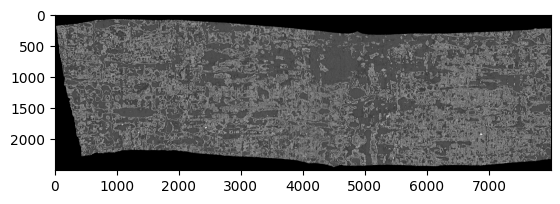

In [10]:
import cv2
import matplotlib.pyplot as plt
# Load image
img = cv2.imread('train_scrolls/s30/layers/60.tif')
print(img.shape)
plt.imshow(img)

In [ ]:
from models.resnetall import generate_model
import torch

# RESNET 101 WITH PRETRAINED BACKBONE ON KINETICS
model = generate_model(
    model_depth=101,
    n_input_channels=1,
    forward_features=True,
    n_classes=1039  # This can be dummy if only using features
)


# # LOAD YOUSEF PRETRAINED WEIGHTS ON BACKBONE
ckpt = torch.load("checkpoints/wild14_deduped_64_pretrained2_20231210121321_0_fr_i3depoch=3-v2_256.ckpt", map_location="cpu", weights_only=False)

full_state_dict = ckpt["state_dict"]  # Adjust this if it's not in "state_dict"

# # Extract and clean backbone weights
backbone_state_dict = {
    k.replace("backbone.", ""): v
    for k, v in full_state_dict.items()
    if k.startswith("backbone.")
}

# # Load into your backbone
model.load_state_dict(backbone_state_dict, strict=False)

# # Freeze
# for param in self.backbone.parameters():
#     param.requires_grad = False


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL getattr was not an allowed global by default. Please use `torch.serialization.add_safe_globals([getattr])` or the `torch.serialization.safe_globals([getattr])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [32]:
from unetr_segformer import UNETR_Segformer
import torch
from collections import OrderedDict

checkpoint = torch.load("checkpoints/best-checkpoint-epoch=13-val_iou=0.71.ckpt", map_location="cpu")
state_dict = checkpoint["state_dict"]


In [ ]:
cleaned_state_dict = OrderedDict()
for k, v in state_dict.items():
    new_key = k.replace("model.", "")  # Remove LightningModule prefix
    cleaned_state_dict[new_key] = v

print

odict_keys(['encoder.transformer.embeddings.position_embeddings', 'encoder.transformer.embeddings.patch_embeddings.weight', 'encoder.transformer.embeddings.patch_embeddings.bias', 'encoder.transformer.layer.0.attention_norm.weight', 'encoder.transformer.layer.0.attention_norm.bias', 'encoder.transformer.layer.0.mlp_norm.weight', 'encoder.transformer.layer.0.mlp_norm.bias', 'encoder.transformer.layer.0.mlp.w_1.weight', 'encoder.transformer.layer.0.mlp.w_1.bias', 'encoder.transformer.layer.0.mlp.w_2.weight', 'encoder.transformer.layer.0.mlp.w_2.bias', 'encoder.transformer.layer.0.attn.query.weight', 'encoder.transformer.layer.0.attn.query.bias', 'encoder.transformer.layer.0.attn.key.weight', 'encoder.transformer.layer.0.attn.key.bias', 'encoder.transformer.layer.0.attn.value.weight', 'encoder.transformer.layer.0.attn.value.bias', 'encoder.transformer.layer.0.attn.out.weight', 'encoder.transformer.layer.0.attn.out.bias', 'encoder.transformer.layer.1.attention_norm.weight', 'encoder.transf

In [34]:
hparams = checkpoint["hyper_parameters"]

model = UNETR_Segformer(
    patch_size=hparams["patch_size"],
    label_size=hparams["label_size"],
    in_chans=hparams["in_chans"],
    unetr_out_channels=hparams["unetr_out_channels"],
    segformer_from_pretrained=hparams["segformer_from_pretrained"],
    dropout=0.2,
    mini_unetr=hparams["mini_unetr"]
)



Model Parameters:
UNETR parameters: 31,871,488
Segformer parameters: 47,314,177
Total parameters: 79,185,665


In [35]:
model.load_state_dict(cleaned_state_dict, strict=True)  # or strict=False if some keys are extra

<All keys matched successfully>

In [36]:
print("patch_size =", hparams["patch_size"])
print("label_size =", hparams["label_size"])
print("in_chans =", hparams["in_chans"])
print("unetr_out_channels =", hparams["unetr_out_channels"])
print("segformer_from_pretrained =", hparams["segformer_from_pretrained"])
print("mini_unetr =", hparams["mini_unetr"])

patch_size = 128
label_size = 32
in_chans = 16
unetr_out_channels = 32
segformer_from_pretrained = nvidia/mit-b3
mini_unetr = True


# RESIZE (0)

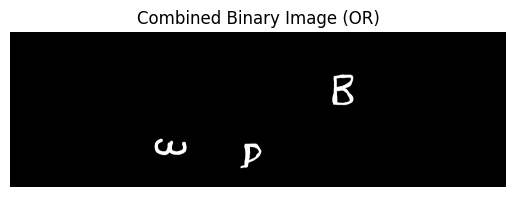

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary images as grayscale
path1 = "train_scrolls/s30/s30_inklabels.png"
path2 = "s30_inklabels.png"

img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)

# Resize img2 to match img1's size
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Binarize in case there are any grayscale values
_, binary1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, binary2 = cv2.threshold(img2_resized, 127, 255, cv2.THRESH_BINARY)

# Logical OR to combine both binary masks
combined = cv2.bitwise_or(binary1, binary2)

# Save the result
cv2.imwrite("combined_binary.png", combined)

# Display the result
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.title("Combined Binary Image (OR)")
plt.show()


# RESIZE AND OVERLAY

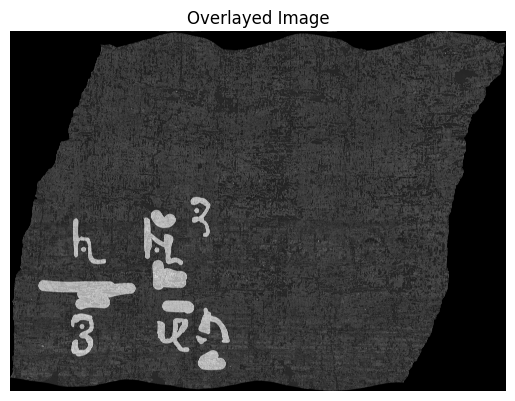

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Provide your two image paths here
path1 = "train_scrolls/20231210132040/layers/30.tif"
path2 = "pseudo (3).png"

# Load the images
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

# Resize img2 to match img1's dimensions
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Overlay: Simple average (50% opacity each)
overlay = cv2.addWeighted(img1, 0.5, img2_resized, 0.5, 0)

# Convert from BGR to RGB for proper display with matplotlib
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

cv2.imwrite("20231210132040_mask.png", img2_resized)


# Show the result
plt.imshow(overlay_rgb)
plt.axis('off')
plt.title("Overlayed Image")
plt.show()

In [85]:
from einops import rearrange
import torch
import torch.nn as nn
import torch.nn.functional as F
from timesformer.models.vit import TimeSformer
class MAETimeSformerEncoder(TimeSformer):
    def __init__(self, mask_ratio=0.75, **kwargs):
        super().__init__(**kwargs)
        self.mask_ratio = mask_ratio

    def random_masking(self, x):
        B, N, D = x.shape
        
        len_keep = int(N * (1 - self.mask_ratio))
        noise = torch.rand(B, N, device=x.device)
        ids_shuffle = torch.argsort(noise, dim=1)
        ids_restore = torch.argsort(ids_shuffle, dim=1)
        ids_keep = ids_shuffle[:, :len_keep]

        x_masked = torch.gather(x, 1, ids_keep.unsqueeze(-1).expand(-1, -1, D))

        mask = torch.ones([B, N], device=x.device)
        mask[:, :len_keep] = 0
        mask = torch.gather(mask, 1, ids_restore)

        return x_masked, mask, ids_restore

    def forward_features(self, x):
        B = x.shape[0]
        x, T, W = self.model.patch_embed(x)

        
        cls_tokens = self.model.cls_token.expand(x.size(0), -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        ## resizing the positional embeddings in case they don't match the input at inference
        if x.size(1) != self.model.pos_embed.size(1):
            pos_embed = self.model.pos_embed
            cls_pos_embed = pos_embed[0,0,:].unsqueeze(0).unsqueeze(1)
            other_pos_embed = pos_embed[0,1:,:].unsqueeze(0).transpose(1, 2)
            P = int(other_pos_embed.size(2) ** 0.5)
            H = x.size(1) // W
            other_pos_embed = other_pos_embed.reshape(1, x.size(2), P, P)
            new_pos_embed = F.interpolate(other_pos_embed, size=(H, W), mode='nearest')
            new_pos_embed = new_pos_embed.flatten(2)
            new_pos_embed = new_pos_embed.transpose(1, 2)
            new_pos_embed = torch.cat((cls_pos_embed, new_pos_embed), 1)
            x = x + new_pos_embed
        else:
            x = x + self.model.pos_embed
        x = self.model.pos_drop(x)

        cls_tokens = x[:, 0, :].unsqueeze(1)
        x = x[:, 1:]
        x, mask, ids_restore = self.random_masking(x)
        x = torch.cat((cls_tokens, x), dim=1)
        
                # This should be based on the number of patches per frame (before masking)
        N_patches = x.shape[1]-1  # subtract cls token if present
        H = W = int(N_patches ** 0.5)
        assert H * W == N_patches, f"Inferred HxW ({H}x{W}) doesn't match patch count {N_patches}"

        print('B: ', B, 'T:', T, 'W:', W)
        
        ## Time Embeddings
        if self.attention_type != 'space_only':
            cls_tokens = x[:B, 0, :].unsqueeze(1)
            x = x[:,1:]
            x = rearrange(x, '(b t) n m -> (b n) t m',b=B,t=T)
            ## Resizing time embeddings in case they don't match
            if T != self.model.time_embed.size(1):
                time_embed = self.model.time_embed.transpose(1, 2)
                new_time_embed = F.interpolate(time_embed, size=(T), mode='nearest')
                new_time_embed = new_time_embed.transpose(1, 2)
                x = x + new_time_embed
            else:
                x = x + self.model.time_embed
            x = self.model.time_drop(x)
            x = rearrange(x, '(b n) t m -> b (n t) m',b=B,t=T)
            x = torch.cat((cls_tokens, x), dim=1)

        ## Attention blocks
        for blk in self.model.blocks:
            x = blk(x, B, T, W)

        ### Predictions for space-only baseline
        if self.model.attention_type == 'space_only':
            x = rearrange(x, '(b t) n m -> b t n m',b=B,t=T)
            x = torch.mean(x, 1) # averaging predictions for every frame

        x = self.model.norm(x)
        print('x shape: ', x.shape)
        return x[:, 0], mask, ids_restore

    def forward(self, x):
        x, mask, ids_restore = self.forward_features(x)
        # x = self.model.head(x)
        print(f"Output shape: {x.shape}")  # (B, embed_dim) or (B, num_classes) if head is applied
        return x, mask, ids_restore


# class MAETimeSformerEncoder(TimeSformer):
#     def __init__(self, mask_ratio=0.75,**kwargs):
#         super().__init__(**kwargs)
#         self.mask_ratio = mask_ratio

#     def random_masking(self, x):
#         B, N, D = x.shape
#         len_keep = int(N * (1 - self.mask_ratio))
#         noise = torch.rand(B, N, device=x.device)
#         ids_shuffle = torch.argsort(noise, dim=1)
#         ids_restore = torch.argsort(ids_shuffle, dim=1)
#         ids_keep = ids_shuffle[:, :len_keep]
#         x_masked = torch.gather(x, 1, ids_keep.unsqueeze(-1).expand(-1, -1, D))
#         mask = torch.ones([B, N], device=x.device)
#         mask[:, :len_keep] = 0
#         mask = torch.gather(mask, 1, ids_restore)
#         return x_masked, mask, ids_restore

#     def forward(self, x):
#         # Patch embed
#         x, T, W = self.model.patch_embed(x)  # x: (B*T, N, D)
#         B_T, N, D = x.shape
#         B = B_T // T

#         # Restore batch and time dims
#         x = x.view(B* T, N, D)  # (B, N_patches_total, D)

#         # Add pos embed (excluding cls token if you have it)
#         x = x + self.model.pos_embed[:, 1:, :]

#         # Mask patches (MAE-style)
#         x_visible, mask, ids_restore = self.random_masking(x)

#         # Encoder blocks
#         x_visible = self.model.pos_drop(x_visible)
#         for blk in self.model.blocks:
#             x_visible = blk(x_visible, B,T,W)
#         x_visible = self.norm(x_visible)

#         return x_visible, mask, ids_restore


class MAETimeSformerDecoder(nn.Module):
    def __init__(self, embed_dim, decoder_embed_dim, decoder_depth, num_patches, num_heads):
        super().__init__()
        
        self.num_patches = num_patches
        self.decoder_embed = nn.Linear(embed_dim, decoder_embed_dim, bias=True)
        self.mask_token = nn.Parameter(torch.zeros(1, 1, decoder_embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches, decoder_embed_dim))

        # Transformer decoder blocks
        decoder_layer = nn.TransformerEncoderLayer(
            d_model=decoder_embed_dim,
            nhead=num_heads,
            dim_feedforward=decoder_embed_dim * 4,
            activation='gelu'
        )
        self.blocks = nn.TransformerEncoder(decoder_layer, num_layers=decoder_depth)
        self.norm = nn.LayerNorm(decoder_embed_dim)

        # Predict patch pixels (reconstruct patches)
        self.pred = nn.Linear(decoder_embed_dim, embed_dim)  

        # Init
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
        nn.init.trunc_normal_(self.mask_token, std=0.02)

    def forward(self, x_visible, ids_restore):
        B, N_visible, D = x_visible.shape
        N = self.num_patches

        # Embed visible tokens to decoder embed dim
        x = self.decoder_embed(x_visible)

        # Prepare mask tokens
        mask_tokens = self.mask_token.repeat(B, N - N_visible, 1)

        # Reconstruct full sequence with mask tokens
        x_ = torch.cat([x, mask_tokens], dim=1)  # (B, N_visible + N_mask, decoder_embed_dim)

        # Unshuffle tokens to original order
        x_ = torch.gather(x_, dim=1, index=ids_restore.unsqueeze(-1).expand(-1, -1, x_.shape[-1]))

        # Add positional embedding
        x_ = x_ + self.pos_embed

        # Transformer decoder blocks
        x_ = self.blocks(x_)
        x_ = self.norm(x_)

        # Predict patches pixels
        pred = self.pred(x_)  # (B, N, embed_dim)
        return pred


class MAETimeSformer(nn.Module):
    def __init__(self, encoder_config, decoder_embed_dim=256, decoder_depth=4, decoder_num_heads=8, mask_ratio=0.75):
        super().__init__()
        encoder_embed_dim = encoder_config.pop('embed_dim', 768)  # Default embed_dim if not specified
        self.encoder = MAETimeSformerEncoder(**encoder_config, mask_ratio=mask_ratio)
        # Number of patches depends on input video size & patch size in encoder
        # Here assume encoder.patch_embed creates self.patch_embed.num_patches attribute or calculate manually:
        self.num_patches = self.encoder.model.patch_embed.num_patches


        self.decoder = MAETimeSformerDecoder(
            embed_dim=encoder_embed_dim,
            decoder_embed_dim=decoder_embed_dim,
            decoder_depth=decoder_depth,
            num_patches=self.num_patches,
            num_heads=decoder_num_heads,
        )

    def forward(self, x):
        x_visible, mask, ids_restore = self.encoder(x)
        print(f"Visible patches shape: {x_visible.shape}")  # (B, N_visible, embed_dim)
        print(f"Mask shape: {mask.shape}")  # (B, N_patches)
        print(f"IDs restore shape: {ids_restore.shape}")  # (B, N_patches)
        pred = self.decoder(x_visible, ids_restore)
        return pred, mask


# Example usage:
if __name__ == "__main__":
    # Dummy config matching TimeSformer init args (example)
    encoder_config ={
        'img_size': 224,
        'patch_size': 16,
        'num_frames': 32,
        'embed_dim': 768,
        # 'depth': 12,
        # 'num_heads': 12,
        # 'in_chans': 1,
        'pretrained_model':'/home/ubuntu/TimeSformer/chekpoints/TimeSformer_divST_32x32_224_HowTo100M.pyth'
    }

    model = MAETimeSformer(encoder_config, mask_ratio=0.75)

    # Dummy input video (B, C, T, H, W)
    x = torch.randn(2, 3, 32, 224, 224)

    pred, mask = model(x)

    print(f"Output prediction shape: {pred.shape}")  # (B, N_patches, embed_dim)
    print(f"Mask shape: {mask.shape}")                # (B, N_patches)


B:  2 T: 32 W: 7
x shape:  torch.Size([2, 1569, 768])
Output shape: torch.Size([2, 768])
Visible patches shape: torch.Size([2, 768])
Mask shape: torch.Size([64, 196])
IDs restore shape: torch.Size([64, 196])


ValueError: not enough values to unpack (expected 3, got 2)

In [1]:
import torch
from timesformer.models.vit import TimeSformer

model = TimeSformer(img_size=256, num_classes=400, num_frames=8, attention_type='divided_space_time')

dummy_video = torch.randn(2, 3, 8, 224, 224) # (batch x channels x frames x height x width)

pred = model(dummy_video,) # (2, 400)

ModuleNotFoundError: No module named 'timesformer'

In [28]:
import torch
import segmentation_models_pytorch as smp

dice = smp.losses.DiceLoss(mode='binary')

# Predicted logits
logits = torch.tensor([[[-0.2, 2.0]]], dtype=torch.float32)  # shape [B, 1, H, W]
# Smoothed labels (e.g., from pseudo-labeling or label smoothing)
target = torch.tensor([[[0.25, 0.75]]], dtype=torch.float32)  # soft labels

loss = dice(logits, target)
print(loss.item())


0.14198559522628784


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Provide your image path
path1 = "wandb/resnet_1_5_div2/files/media/images/masks_1178_d4868cc4364aec59b0b9.png"

# Load the image
img1 = cv2.imread(path1)

# Crop the image to half its width and height (using NumPy slicing)
img2_resized = img1[:img1.shape[0]//2, :img1.shape[1]//2]

# Save the cropped image as 'resized.png'
cv2.imwrite("resized.png", img2_resized)


True

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Provide your image path
path1 = path1 = "train_scrolls/20231210132040/layers/30.tif"

# Load the image
img1 = cv2.imread(path1)
img1 = cv2.resize(img1, (img1.shape[1]//16,img1.shape[0]//16))
# Crop the image to half its width and height (using NumPy slicing)
# img2_resized = img1[:img1.shape[0]//2, :img1.shape[1]//2]

# Save the cropped image as 'resized.png'
cv2.imwrite("resized.png", img1)

True

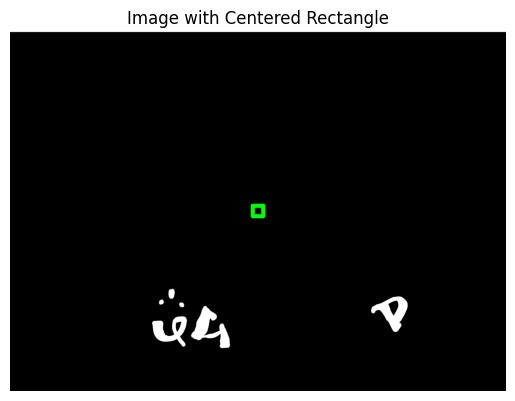

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Provide your image path
path1 = "train_scrolls/20231210132040/20231210132040_inklabels.png"#layers/30.tif"

# Load the image
img1 = cv2.imread(path1)

# Get image dimensions
height, width = img1.shape[:2]
img1 = cv2.resize(img1, (width//2, height//2))  # Resize to 512x512 for consistency


# Define the size of the rectangle
rect_size = 128

# Compute the top-left and bottom-right coordinates of the centered rectangle
start_x = (width//2 - rect_size) // 2
start_y = (height//2 - rect_size) // 2
end_x = start_x + rect_size
end_y = start_y + rect_size

# Draw the rectangle (green with thickness 2)
cv2.rectangle(img1, (start_x, start_y), (end_x, end_y), color=(0, 255, 0), thickness=50)

# Save or display the result
# cv2.imwrite("centered_rectangle.png", img1)

# Optional: Display using matplotlib
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image with Centered Rectangle")
plt.axis("off")
plt.show()


In [ ]:
# import torch
# from models.resnetall import generate_model
# backbone = generate_model(
#     model_depth=101,
#     n_input_channels=1,
#     forward_features=True,
#     n_classes=1039  # This can be dummy if only using features
# )
# checkpoint = torch.load("checkpoints/pretraining_101epoch=19-v1.ckpt", map_location="cpu", weights_only=False)
# backbone_state_dict = {
#     k.replace("backbone.", ""): v
#     for k, v in checkpoint["state_dict"].items()
#     if k.startswith("backbone.")
# }
# for param in backbone.parameters():
#     param.requires_grad = False
# backbone.load_state_dict(backbone_state_dict, strict=True)

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
# from functools import partial
# import torch
# import torch.nn as nn
# import sys
# sys.path.append('/home/ubuntu/TimeSformer')  # adjust to your path
# from timesformer.models.vit import TimeSformer, VisionTransformer
# import torch.nn.functional as F
# from einops import rearrange


# class TimeSformerEncoder(Times):
#     def __init__(self, img_size=224, patch_size=16, num_classes=1, num_frames=32, attention_type='divided_space_time',  pretrained_model='', **kwargs):
#         super().__init__(img_size=img_size, patch_size=patch_size, num_classes=num_classes,
#                          num_frames=num_frames, attention_type='divided_space_time', **kwargs)
#         self.pretrained=True
#         # self.model = VisionTransformer(img_size=img_size, num_classes=num_classes, patch_size=patch_size, embed_dim=768, depth=12, num_heads=12, mlp_ratio=4, qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6), drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1, num_frames=num_frames, attention_type=attention_type, **kwargs)

#         self.attention_type = attention_type
#         # self.model.default_cfg = default_cfgs['vit_base_patch'+str(patch_size)+'_224']
#         self.num_patches = (img_size // patch_size) * (img_size // patch_size)
#         # if self.pretrained:
            
#             # load_pretrained(self.model, num_classes=self.model.num_classes, in_chans=kwargs.get('in_chans', 3), filter_fn=_conv_filter, img_size=img_size, num_frames=num_frames, num_patches=self.num_patches, attention_type=self.attention_type, pretrained_model=pretrained_model)
#     # def forward(self, x):
#     #     x = self.model(x)
#     #     return x

    

#     # def __init__(self, img_size=224, num_classes=1, num_frames=32, attention_type='divided_space_time'):
#     #     super().__init__(img_size=img_size,
#     #         num_classes=num_classes,
#     #         num_frames=num_frames,
#     #         attention_type=attention_type)

#     def forward_features(self, x):
#         B = x.shape[0]
#         x, T, W = self.patch_embed(x)
#         cls_tokens = self.cls_token.expand(x.size(0), -1, -1)
#         x = torch.cat((cls_tokens, x), dim=1)

#         ## resizing the positional embeddings in case they don't match the input at inference
#         if x.size(1) != self.pos_embed.size(1):
#             pos_embed = self.pos_embed
#             cls_pos_embed = pos_embed[0,0,:].unsqueeze(0).unsqueeze(1)
#             other_pos_embed = pos_embed[0,1:,:].unsqueeze(0).transpose(1, 2)
#             P = int(other_pos_embed.size(2) ** 0.5)
#             H = x.size(1) // W
#             other_pos_embed = other_pos_embed.reshape(1, x.size(2), P, P)
#             new_pos_embed = F.interpolate(other_pos_embed, size=(H, W), mode='nearest')
#             new_pos_embed = new_pos_embed.flatten(2)
#             new_pos_embed = new_pos_embed.transpose(1, 2)
#             new_pos_embed = torch.cat((cls_pos_embed, new_pos_embed), 1)
#             x = x + new_pos_embed
#         else:
#             x = x + self.pos_embed
#         x = self.pos_drop(x)


#         ## Time Embeddings
#         if self.attention_type != 'space_only':
#             cls_tokens = x[:B, 0, :].unsqueeze(1)
#             x = x[:,1:]
#             x = rearrange(x, '(b t) n m -> (b n) t m',b=B,t=T)
#             ## Resizing time embeddings in case they don't match
#             if T != self.time_embed.size(1):
#                 time_embed = self.time_embed.transpose(1, 2)
#                 new_time_embed = F.interpolate(time_embed, size=(T), mode='nearest')
#                 new_time_embed = new_time_embed.transpose(1, 2)
#                 x = x + new_time_embed
#             else:
#                 x = x + self.time_embed
#             x = self.time_drop(x)
#             x = rearrange(x, '(b n) t m -> b (n t) m',b=B,t=T)
#             x = torch.cat((cls_tokens, x), dim=1)

#         ## Attention blocks
#         for blk in self.blocks:
#             x = blk(x, B, T, W)

#         ### Predictions for space-only baseline
#         if self.attention_type == 'space_only':
#             x = rearrange(x, '(b t) n m -> b t n m',b=B,t=T)
#             x = torch.mean(x, 1) # averaging predictions for every frame

#         x = self.norm(x)
#         return x
    
#     def forward(self, x):
#         x = self.forward_features(x)
#         x = self.head(x)
#         return x



# model = TimeSformerEncoder(img_size=224, num_classes=1, num_frames=32,attention_type='divided_space_time')

# dummy_video = torch.randn(2, 3, 32, 224, 224) # (batch x channels x frames x height x width)

# pred = model(dummy_video)
# print(pred.shape)

torch.Size([2, 6273, 1])


In [ ]:
from functools import partial
import torch
import torch.nn as nn
import sys
sys.path.append('/home/ubuntu/TimeSformer')  # adjust to your path
from timesformer.models.vit import TimeSformer, VisionTransformer, load_pretrained, _conv_filter, default_cfgs
import torch.nn.functional as F
from einops import rearrange

class MyVisionTransformer(VisionTransformer):
    """ Vision Transformere
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=3, num_classes=1000, embed_dim=768, depth=12,
                 num_heads=12, mlp_ratio=4., qkv_bias=False, qk_scale=None, drop_rate=0., attn_drop_rate=0.,
                 drop_path_rate=0.1, hybrid_backbone=None, norm_layer=nn.LayerNorm, num_frames=8, attention_type='divided_space_time', dropout=0.):
        
        super().__init__(img_size, patch_size, in_chans, num_classes, embed_dim, depth,
                 num_heads, mlp_ratio, qkv_bias, qk_scale, drop_rate, attn_drop_rate,
                 drop_path_rate, hybrid_backbone, norm_layer, num_frames, attention_type, dropout)
        
        self.num_frames = num_frames
        
        
    def forward_features(self, x):
        B = x.shape[0]
        x, T, W = self.patch_embed(x)
        cls_tokens = self.cls_token.expand(x.size(0), -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        ## resizing the positional embeddings in case they don't match the input at inference
        if x.size(1) != self.pos_embed.size(1):
            pos_embed = self.pos_embed
            cls_pos_embed = pos_embed[0,0,:].unsqueeze(0).unsqueeze(1)
            other_pos_embed = pos_embed[0,1:,:].unsqueeze(0).transpose(1, 2)
            P = int(other_pos_embed.size(2) ** 0.5)
            H = x.size(1) // W
            other_pos_embed = other_pos_embed.reshape(1, x.size(2), P, P)
            new_pos_embed = F.interpolate(other_pos_embed, size=(H, W), mode='nearest')
            new_pos_embed = new_pos_embed.flatten(2)
            new_pos_embed = new_pos_embed.transpose(1, 2)
            new_pos_embed = torch.cat((cls_pos_embed, new_pos_embed), 1)
            x = x + new_pos_embed
        else:
            x = x + self.pos_embed
        x = self.pos_drop(x)


        ## Time Embeddings
        if self.attention_type != 'space_only':
            cls_tokens = x[:B, 0, :].unsqueeze(1)
            x = x[:,1:]
            x = rearrange(x, '(b t) n m -> (b n) t m',b=B,t=T)
            ## Resizing time embeddings in case they don't match
            if T != self.time_embed.size(1):
                time_embed = self.time_embed.transpose(1, 2)
                new_time_embed = F.interpolate(time_embed, size=(T), mode='nearest')
                new_time_embed = new_time_embed.transpose(1, 2)
                x = x + new_time_embed
            else:
                x = x + self.time_embed
            x = self.time_drop(x)
            x = rearrange(x, '(b n) t m -> b (n t) m',b=B,t=T)
            x = torch.cat((cls_tokens, x), dim=1)

        ## Attention blocks
        for blk in self.blocks:
            x = blk(x, B, T, W)

        ### Predictions for space-only baseline
        if self.attention_type == 'space_only':
            x = rearrange(x, '(b t) n m -> b t n m',b=B,t=T)
            x = torch.mean(x, 1) # averaging predictions for every frame

        x = self.norm(x)
        return x[:, 1:, :]

    def forward(self, x):
        x = self.forward_features(x)
        print(x.shape)
        x = x.reshape(2,16,196, self.embed_dim)  # Reshape to (B, N_patches, embed_dim)
        x = x.max(dim=1)[0]
        x = self.head(x)
        return x


class TimeSformerEncoder(nn.Module):
    def __init__(self, img_size=224, patch_size=16, num_classes=400, num_frames=8, attention_type='divided_space_time',  pretrained_model='', **kwargs):
        super().__init__()
        self.pretrained=True
        self.model = MyVisionTransformer(img_size=img_size, num_classes=num_classes, patch_size=patch_size, embed_dim=768, depth=12, num_heads=12, mlp_ratio=4, qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6), drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1, num_frames=num_frames, attention_type=attention_type, **kwargs)

        self.attention_type = attention_type
        self.model.default_cfg = default_cfgs['vit_base_patch'+str(patch_size)+'_224']
        self.num_patches = (img_size // patch_size) * (img_size // patch_size)
        if self.pretrained:
            
            load_pretrained(self.model, num_classes=self.model.num_classes, in_chans=kwargs.get('in_chans', 3), filter_fn=_conv_filter, img_size=img_size, num_frames=num_frames, num_patches=self.num_patches, attention_type=self.attention_type, pretrained_model=pretrained_model)
    def forward(self, x):
        x = self.model(x)
        # x = torch.max(x, dim=1)[0]  # Take max across frames if needed
        return x

    



model = TimeSformerEncoder(img_size=224, num_classes=1, num_frames=16,attention_type='divided_space_time', in_chans=1)
print(model.model)
dummy_video = torch.randn(2, 1, 16, 224, 224) # (batch x channels x frames x height x width)

pred = model(dummy_video)
print(pred.shape)

MyVisionTransformer(
  (dropout): Dropout(p=0.0, inplace=False)
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (time_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
      )
      (temporal_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (temporal_attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
        (attn_drop): Dropout(p=0.0, inplace=False)
      )
      

In [59]:
# checkpoint = torch.load('checkpoints/TimeSformer_divST_32x32_224_HowTo100M.pyth')

# # Check what's inside
# print(checkpoint.keys())  # This will show keys like: ['epoch', 'model_state', 'optimizer_state', 'cfg']

# # Extract the model weights only
# model_state_dict = checkpoint['model_state']  # or 'model_state_dict', depends on your checkpoint
# model_state_dict.pop('model.head.weight', None)  # Remove head if you don't need it
# model_state_dict.pop('model.head.bias', None)  # Remove head bias if you don't need it
# # print(model_state_dict.keys())  # Check the keys to ensure they match your model's architecture
# # Load weights
# model.load_state_dict(model_state_dict, strict=False)  # Use strict=False if you have extra keys or missing keys
# Load checkpoint
checkpoint = torch.load('checkpoints/TimeSformer_divST_32x32_224_HowTo100M.pyth')

# Extract model weights
state_dict = checkpoint['model_state']  # or 'state_dict' depending on your checkpoint

# # Remove 'model.' prefix from keys
# new_state_dict = {}
# for k, v in state_dict.items():
#     new_key = k.replace('model.', '') if k.startswith('model.') else k
#     new_state_dict[new_key] = v

# Optional: remove head weights if not needed
state_dict.pop('model.head.weight', None)
state_dict.pop('model.head.bias', None)

# Load weights into your model
model.load_state_dict(state_dict, strict=False)


_IncompatibleKeys(missing_keys=['model.head.weight', 'model.head.bias'], unexpected_keys=[])

In [ ]:
# # Extract model weights
# state_dict = checkpoint['model_state']
# # Remove unexpected keys
# for key in list(state_dict.keys()):
#     if "qkv.bias" in key or "temporal_attn.qkv.bias" in key:
#         del state_dicat[key]

# # Load with strict=False
# model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['cls_token', 'pos_embed', 'time_embed', 'patch_embed.proj.weight', 'patch_embed.proj.bias', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.attn.qkv.weight', 'blocks.0.attn.proj.weight', 'blocks.0.attn.proj.bias', 'blocks.0.temporal_norm1.weight', 'blocks.0.temporal_norm1.bias', 'blocks.0.temporal_attn.qkv.weight', 'blocks.0.temporal_attn.proj.weight', 'blocks.0.temporal_attn.proj.bias', 'blocks.0.temporal_fc.weight', 'blocks.0.temporal_fc.bias', 'blocks.0.norm2.weight', 'blocks.0.norm2.bias', 'blocks.0.mlp.fc1.weight', 'blocks.0.mlp.fc1.bias', 'blocks.0.mlp.fc2.weight', 'blocks.0.mlp.fc2.bias', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight', 'blocks.1.attn.proj.weight', 'blocks.1.attn.proj.bias', 'blocks.1.temporal_norm1.weight', 'blocks.1.temporal_norm1.bias', 'blocks.1.temporal_attn.qkv.weight', 'blocks.1.temporal_attn.proj.weight', 'blocks.1.temporal_attn.proj.bias', 'blocks.1.temporal_fc.weight', 'blocks.1.tempo

In [47]:
# Check the first few weights in the backbone
for name, param in model.named_parameters():
    print(name, param.mean(), param.std())
    # break  # Just to print the first one for a quick check


model.cls_token tensor(0.0013, grad_fn=<MeanBackward0>) tensor(0.0850, grad_fn=<StdBackward0>)
model.pos_embed tensor(0.0004, grad_fn=<MeanBackward0>) tensor(0.1121, grad_fn=<StdBackward0>)
model.time_embed tensor(-2.8231e-09, grad_fn=<MeanBackward0>) tensor(0.0122, grad_fn=<StdBackward0>)
model.patch_embed.proj.weight tensor(1.1225e-05, grad_fn=<MeanBackward0>) tensor(0.0395, grad_fn=<StdBackward0>)
model.patch_embed.proj.bias tensor(0.0052, grad_fn=<MeanBackward0>) tensor(0.1711, grad_fn=<StdBackward0>)
model.blocks.0.norm1.weight tensor(0.1841, grad_fn=<MeanBackward0>) tensor(0.0555, grad_fn=<StdBackward0>)
model.blocks.0.norm1.bias tensor(0.0211, grad_fn=<MeanBackward0>) tensor(0.0440, grad_fn=<StdBackward0>)
model.blocks.0.attn.qkv.weight tensor(-1.7020e-05, grad_fn=<MeanBackward0>) tensor(0.0813, grad_fn=<StdBackward0>)
model.blocks.0.attn.qkv.bias tensor(-0.0014, grad_fn=<MeanBackward0>) tensor(0.1129, grad_fn=<StdBackward0>)
model.blocks.0.attn.proj.weight tensor(-1.0691e-05, g

In [10]:
pred.shape

torch.Size([2, 10])

In [12]:
print(model)

TimeSformer(
  (to_patch_embedding): Linear(in_features=768, out_features=512, bias=True)
  (frame_rot_emb): RotaryEmbedding()
  (image_rot_emb): AxialRotaryEmbedding()
  (layers): ModuleList(
    (0-11): 12 x ModuleList(
      (0-1): 2 x PreNorm(
        (fn): Attention(
          (to_qkv): Linear(in_features=512, out_features=1536, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=512, out_features=512, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
      (2): PreNorm(
        (fn): FeedForward(
          (net): Sequential(
            (0): Linear(in_features=512, out_features=4096, bias=True)
            (1): GEGLU()
            (2): Dropout(p=0.1, inplace=False)
            (3): Linear(in_features=2048, out_features=512, bias=True)
          )
        )
        (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
    )
  )
  (

In [14]:
import torch
from timesformer_pytorch import TimeSformer

# Define the model exactly as used in the pre-trained weights
model = TimeSformer(
    image_size=224,
    patch_size=16,
    num_frames=32,
    num_classes=400,  # or 174 or whatever HowTo100M uses (you can change later)
    depth=12,
    heads=12,
    dim=768,
    dim_head=64,
    attn_dropout=0.1,
    ff_dropout=0.1
)

# Load checkpoint
ckpt_path = "/home/ubuntu/TimeSformer/chekpoints/TimeSformer_divST_32x32_224_HowTo100M.pyth"
checkpoint = torch.load(ckpt_path, map_location='cpu')

# If it's a state_dict directly
if 'model_state' in checkpoint:
    state_dict = checkpoint['model_state']
elif 'state_dict' in checkpoint:
    state_dict = checkpoint['state_dict']
else:
    state_dict = checkpoint  # assume it's the raw state dict

# Strip any 'module.' prefixes (common in multi-GPU checkpoints)
new_state_dict = {k.replace('module.', ''): v for k, v in state_dict.items()}

# Load the weights
model.load_state_dict(new_state_dict, strict=False)  # strict=False allows head mismatch


_IncompatibleKeys(missing_keys=['cls_token', 'to_patch_embedding.weight', 'to_patch_embedding.bias', 'frame_rot_emb.inv_freqs', 'image_rot_emb.scales', 'layers.0.0.fn.to_qkv.weight', 'layers.0.0.fn.to_out.0.weight', 'layers.0.0.fn.to_out.0.bias', 'layers.0.0.norm.weight', 'layers.0.0.norm.bias', 'layers.0.1.fn.to_qkv.weight', 'layers.0.1.fn.to_out.0.weight', 'layers.0.1.fn.to_out.0.bias', 'layers.0.1.norm.weight', 'layers.0.1.norm.bias', 'layers.0.2.fn.net.0.weight', 'layers.0.2.fn.net.0.bias', 'layers.0.2.fn.net.3.weight', 'layers.0.2.fn.net.3.bias', 'layers.0.2.norm.weight', 'layers.0.2.norm.bias', 'layers.1.0.fn.to_qkv.weight', 'layers.1.0.fn.to_out.0.weight', 'layers.1.0.fn.to_out.0.bias', 'layers.1.0.norm.weight', 'layers.1.0.norm.bias', 'layers.1.1.fn.to_qkv.weight', 'layers.1.1.fn.to_out.0.weight', 'layers.1.1.fn.to_out.0.bias', 'layers.1.1.norm.weight', 'layers.1.1.norm.bias', 'layers.1.2.fn.net.0.weight', 'layers.1.2.fn.net.0.bias', 'layers.1.2.fn.net.3.weight', 'layers.1.2.fn

In [10]:
import torch
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b4', pretrained=True)


Using cache found in /mnt/efs/fs1/cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/efficientnet_b4_pyt_amp/versions/20.12.0/files/nvidia_efficientnet-b4_210412.pth" to /mnt/efs/fs1/cache/torch/hub/checkpoints/nvidia_efficientnet-b4_210412.pth


100%|██████████| 74.5M/74.5M [00:01<00:00, 55.6MB/s]


In [28]:
class Decoder(nn.Module):
    def __init__(self, encoder_dims, upscale):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(encoder_dims[i]+encoder_dims[i-1], encoder_dims[i-1], 3, 1, 1, bias=False),
                nn.BatchNorm2d(encoder_dims[i-1]),
                nn.ReLU(inplace=True)
            ) for i in range(1, len(encoder_dims))])

        self.logit = nn.Conv2d(encoder_dims[0], 1, 1, 1, 0)
        self.up = nn.Upsample(scale_factor=upscale, mode="bilinear")

    def forward(self, feature_maps):
        for i in range(len(feature_maps)-1, 0, -1):
            f_up = F.interpolate(feature_maps[i], scale_factor=2, mode="bilinear")
            f = torch.cat([feature_maps[i-1], f_up], dim=1)
            f_down = self.convs[i-1](f)
            feature_maps[i-1] = f_down

        x = self.logit(feature_maps[0])
        mask = self.up(x)
        return mask


In [ ]:
import torch
import torch.nn as nn


# Load pretrained I3D-R50 model (Kinetics-400)
backbone = torch.hub.load('facebookresearch/pytorchvideo', 'i3d_r50', pretrained=True)

old_conv = backbone.blocks[0].conv  # Conv3d(3, 64, ...)
new_conv = nn.Conv3d(
    in_channels=1,
    out_channels=old_conv.out_channels,
    kernel_size=old_conv.kernel_size,
    stride=old_conv.stride,
    padding=old_conv.padding,
    bias=old_conv.bias is not None,
)
with torch.no_grad():
    new_conv.weight.copy_(old_conv.weight.sum(dim=1, keepdim=True))
backbone.blocks[0].conv = new_conv

with torch.no_grad():
    dummy_input = torch.rand(1, 1, 32, 224, 224)  # B, C, T, H, W
    out = backbone(dummy_input)
    encoder_dims = [out.size(1)]
    
print(f"Encoder output dimensions: {encoder_dims}")

# Initialize decoder with these dimensions
decoder = Decoder(
    encoder_dims=encoder_dims,
    upscale=1,
)


def forward(x):
    feats = []
    for i, block in enumerate(backbone.blocks):
        x = block(x)
        if i in {0, 1, 2, 3, 4}:
            feats.append(x)
    out = decoder(feats)
    return out

forward(dummy_input)

Using cache found in /mnt/efs/fs1/cache/torch/hub/facebookresearch_pytorchvideo_main


Encoder output dimensions: [400]


In [33]:
def forward(x):
    feats = []
    for i, block in enumerate(backbone.blocks):
        x = block(x)
        if i in {0, 1, 2, 3, 4}:
            feats.append(x)
    out = decoder(feats)
    return out

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Decoder(nn.Module):
    def __init__(self, encoder_dims, upscale):
        super().__init__()
        self.convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(encoder_dims[i]+encoder_dims[i-1], encoder_dims[i-1], 3, 1, 1, bias=False),
                nn.BatchNorm2d(encoder_dims[i-1]),
                nn.ReLU(inplace=True)
            ) for i in range(1, len(encoder_dims))])

        self.logit = nn.Conv2d(encoder_dims[0], 1, 1, 1, 0)
        self.up = nn.Upsample(scale_factor=upscale, mode="bilinear")

    def forward(self, feature_maps):
        for i in range(len(feature_maps)-1, 0, -1):
            f_up = F.interpolate(feature_maps[i], scale_factor=2, mode="bilinear")
            f = torch.cat([feature_maps[i-1], f_up], dim=1)
            f_down = self.convs[i-1](f)
            feature_maps[i-1] = f_down

        x = self.logit(feature_maps[0])
        mask = self.up(x)
        return mask

# Load pretrained I3D-R50 from PyTorchVideo
backbone = torch.hub.load('facebookresearch/pytorchvideo', 'i3d_r50', pretrained=True)

# Patch input conv to accept 1-channel input
old_conv = backbone.blocks[0].conv
new_conv = nn.Conv3d(
    in_channels=1,
    out_channels=old_conv.out_channels,
    kernel_size=old_conv.kernel_size,
    stride=old_conv.stride,
    padding=old_conv.padding,
    bias=old_conv.bias is not None,
)
with torch.no_grad():
    new_conv.weight.copy_(old_conv.weight.sum(dim=1, keepdim=True))
backbone.blocks[0].conv = new_conv

# Get encoder_dims by running dummy input and collecting all features
dummy_input = torch.rand(1, 1, 30, 256, 256)  # B, C, T, H, W
feats = []
x = dummy_input
with torch.no_grad():
    for i, block in enumerate(backbone.blocks):
        x = block(x)
        if i in {0, 3,4,5}:
            feats.append(x)
encoder_dims = [f.size(1) for f in feats]
print(f"Encoder feature dims: {encoder_dims}")

# Build decoder
decoder = Decoder(encoder_dims=encoder_dims, upscale=1)

# Final forward function
def forward(x):
    feats = []
    for i, block in enumerate(backbone.blocks):
        x = block(x)
        if i in {0, 3,4,5}:
            feats.append(x)  # Permute to match decoder input shape
            print(x.shape)
            
    feat_maps_pooled = [torch.max(f, dim=2)[0] for f in feats]
    print(f"Feature maps pooled shapes: {[f.shape for f in feat_maps_pooled]}")
    out = decoder(feat_maps_pooled)
    return out

# Run forward pass
output = forward(dummy_input)
print(f"Output shape: {output.shape}")


Using cache found in /mnt/efs/fs1/cache/torch/hub/facebookresearch_pytorchvideo_main


Encoder feature dims: [64, 512, 1024, 2048]
torch.Size([1, 64, 30, 64, 64])
torch.Size([1, 512, 15, 32, 32])
torch.Size([1, 1024, 15, 16, 16])
torch.Size([1, 2048, 15, 8, 8])
Feature maps pooled shapes: [torch.Size([1, 64, 64, 64]), torch.Size([1, 512, 32, 32]), torch.Size([1, 1024, 16, 16]), torch.Size([1, 2048, 8, 8])]
Output shape: torch.Size([1, 1, 64, 64])


In [4]:
import torch

# Load the pretrained U-Net model
model = torch.hub.load(
    'mateuszbuda/brain-segmentation-pytorch',  # repo
    'unet',                                    # model name
    in_channels=3,                             # input channels (e.g., RGB)
    out_channels=1,                            # output channels (e.g., segmentation mask)
    init_features=32,                          # number of features in first layer
    pretrained=True                            # load pretrained weights
)

# Example input (this line has an issue)
model(torch.randn(1, 3, 8, 256, 256))

Using cache found in /mnt/efs/fs1/cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 3, 8, 256, 256]

In [3]:
model(torch.randn(1, 3,8, 256, 256))  # Example input

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 3, 8, 256, 256]

In [5]:
from monai.networks.nets import UNETR




/home/ubuntu/miniconda3/envs/dion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/miniconda3/envs/dion/lib/python3.10/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [7]:
model = UNETR(
    in_channels=1,
    out_channels=14,
    img_size=(96, 96, 96),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    # pos_embed='perceptron',
    norm_name='instance',
    conv_block=True,
    res_block=True,
    dropout_rate=0.0)

In [ ]:
model.load_state_dict(torch.load('checkpoints/UNETR_model_best_acc.pth', map_location='cpu'))

# NEW

In [ ]:
from models.resnet import resnet101

model = resnet101(
    sample_input_D=32,
    sample_input_H=256,
    sample_input_W=256,
    num_seg_classes=1
    
)

checkpoint = torch.load('checkpoints/pretrain/resnet_101.pth', map_location='cpu')  # or 'cuda' if on GPU
state_dict = checkpoint['state_dict']

# Remove 'module.' prefix
new_state_dict = {}
for k, v in state_dict.items():
    if k.startswith('module'):
        new_key = k[7:]  # remove first 7 characters: 'module.'
    else:
        new_key = k
    new_state_dict[new_key] = v

model.load_state_dict(new_state_dict, strict = False)


/home/ubuntu/vesuvius_challenge_ink/models/resnet.py:173: FutureWarning: `nn.init.kaiming_normal` is now deprecated in favor of `nn.init.kaiming_normal_`.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')


_IncompatibleKeys(missing_keys=['conv_seg.0.weight', 'conv_seg.0.bias', 'conv_seg.1.weight', 'conv_seg.1.bias', 'conv_seg.1.running_mean', 'conv_seg.1.running_var', 'conv_seg.3.weight', 'conv_seg.4.weight', 'conv_seg.4.bias', 'conv_seg.4.running_mean', 'conv_seg.4.running_var', 'conv_seg.6.weight'], unexpected_keys=[])

In [56]:
x = torch.randn(1, 1, 30, 256, 256)
output = model(x)
print(output.shape)


torch.Size([1, 1, 8, 64, 64])


In [26]:
from monai.networks.nets import resnet101

monai_model = resnet101(
    spatial_dims=3,
    num_classes=1,             # for segmentation head
    pretrained=True,
    n_input_channels =1,
    feed_forward=False,
    shortcut_type ='B',
    bias_downsample =False
    
)



In [36]:
import torch
import torch.nn as nn

class ResNet101Encoder(nn.Module):
    def __init__(self, monai_resnet):
        super().__init__()
        # Copy all layers except classification head
        self.stem = nn.Sequential(
            monai_resnet.conv1,
            monai_resnet.bn1,
            # monai_resnet.gelu,
            monai_resnet.maxpool,
        )
        self.layer1 = monai_resnet.layer1
        self.layer2 = monai_resnet.layer2
        self.layer3 = monai_resnet.layer3
        self.layer4 = monai_resnet.layer4

    def forward(self, x):
        # x0 = self.stem(x)    # output size reduced by 4
        x1 = self.layer1(x) # output size reduced by 4
        x2 = self.layer2(x1) # output size reduced by 8
        x3 = self.layer3(x2) # output size reduced by 16
        x4 = self.layer4(x3) # output size reduced by 32
        return x1, x2, x3, x4


In [37]:
dummy_input = torch.randn(1, 1, 64, 128, 128)  # B, C, D, H, W
encoder = ResNet101Encoder(model)
features = encoder(dummy_input)
encoder_dims = [f.shape[1] for f in features]
print("Encoder dims:", encoder_dims)


RuntimeError: Given groups=1, weight of size [64, 64, 1, 1, 1], expected input[1, 1, 64, 128, 128] to have 64 channels, but got 1 channels instead

In [25]:
input = torch.randn(1, 1, 30, 256, 256)  # Batch x Channels x Depth x Height x Width
output = model(input)  # Output should be shape like (1, 1, D, H, W)
print(output.shape)

torch.Size([1, 2048])


In [21]:
%%capture
!gdown 1CMcTsxSzz6vzvrq_OIwOJFtowI3KHPOa
!gdown 1JnaVPaqDA60zpT7gkq6VtIPf8nlBGi87
!unzip Timeline20250531.zip

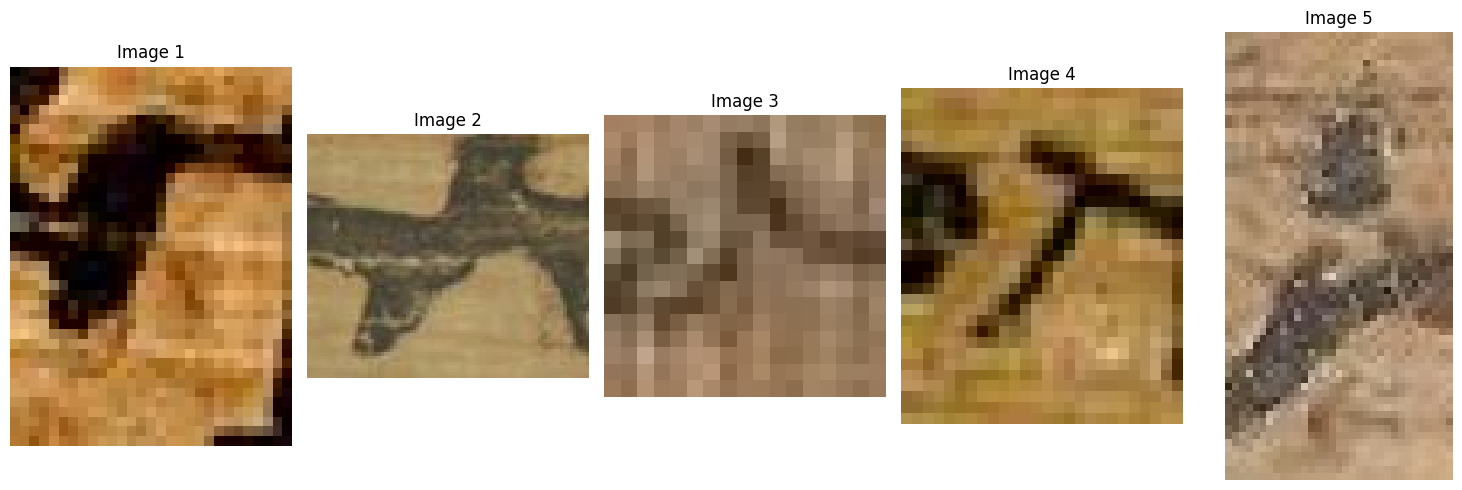

In [24]:
import os
len(os.listdir('Timeline20250531/cliplets/'))
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder = 'Timeline20250531/cliplets/'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display a few images
num_images_to_display = min(5, len(image_files)) # Display up to 5 images

plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    img_path = image_files[i]
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [27]:
from PIL import Image, ImageOps
import numpy as np
import cv2
from sklearn.decomposition import PCA
import numpy as np
from PIL import Image
import cv2

# Function to preprocess images (resize, binarize, normalize and flatten)
def preprocess_image(image_path, size=(32, 32)):
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L')
    img_np = np.array(img)

    # Binarization using Otsu's method
    _, img_bin = cv2.threshold(img_np, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert image: black on white background
    img_bin = 255 - img_bin

    # Resize the **binarized** image
    img_resized = cv2.resize(img_bin, size, interpolation=cv2.INTER_AREA)

    # Normalize pixel values to [0, 1]
    img_normalized = img_resized.astype(np.float32) / 255.0

    # Flatten and return
    return img_normalized.flatten()

# Preprocess all images
image_data = []
for img_file in image_files:
    try:
        processed_img = preprocess_image(img_file)
        image_data.append(processed_img)
    except Exception as e:
        print(f"Error processing image {img_file}: {e}")

image_data = np.array(image_data)

# Reduce dimensionality using PCA
pca = PCA(n_components=400)
image_data_pca = pca.fit_transform(image_data)

In [28]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
import numpy as np

In [29]:
model = resnet50(pretrained=True)
model.eval()  # Set to eval mode

# Remove the final fully connected layer to get feature vectors
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

/home/ubuntu/miniconda3/envs/dion/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/miniconda3/envs/dion/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /mnt/efs/fs1/cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 441MB/s]


In [37]:
preprocess = transforms.Compose([
    transforms.Resize(32),  # ResNet expects 224x224 images
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet normalization
                         std=[0.229, 0.224, 0.225])
])


In [38]:
def extract_resnet_features(image_path):
    img = Image.open(image_path).convert('RGB')  # 3-channel RGB
    
    input_tensor = preprocess(img)
    input_batch = input_tensor.unsqueeze(0)  # Create batch dimension
    
    with torch.no_grad():
        features = feature_extractor(input_batch)
    features = features.squeeze().numpy()  # Remove batch dimension, shape (2048,)
    return features


In [39]:
from tqdm import tqdm
all_features = []
for img_path in tqdm(image_files):
    try:
        feats = extract_resnet_features(img_path)
        all_features.append(feats)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        all_features.append(np.zeros(2048))
        
all_features = np.array(all_features)  # shape (N_images, 2048)

100%|██████████| 13046/13046 [02:12<00:00, 98.32it/s]


In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(all_features)

pca = PCA(n_components=400)
features_pca = pca.fit_transform(features_scaled)

kmeans = KMeans(n_clusters=24, random_state=42)
clusters = kmeans.fit_predict(features_pca)


In [41]:
import pandas as pd
filenames = os.listdir('Timeline20250531/cliplets/')
data = pd.DataFrame({'filename': filenames})
data['letter'] = data.filename.apply(lambda x: x.split('_')[0])
data['TM'] = data.filename.apply(lambda x: int(x.split('_')[1]))
data['number'] = data.filename.apply(lambda x: x.split('_')[2].split('.')[0])
print(data.shape[0])
data.sample(5)
ground_truth_labels = data['letter'].values
ground_truth_labels.shape

13046


(13046,)

In [42]:
# Calculate purity for each cluster
cluster_purity = {}
cluster_most_represented_letter = {}

for cluster_id in range(24):
    # Get indices of images belonging to the current cluster
    indices_in_cluster = np.where(clusters == cluster_id)[0]

    if len(indices_in_cluster) > 0:
        # Get the ground truth letters for images in this cluster
        letters_in_cluster = ground_truth_labels[indices_in_cluster]

        # Count the occurrences of each letter in the cluster
        letter_counts = pd.Series(letters_in_cluster).value_counts()

        # The most frequent letter is the majority class
        most_frequent_letter = letter_counts.index[0]
        most_frequent_count = letter_counts.iloc[0]

        # Purity for the cluster is the fraction of the most frequent class
        purity = most_frequent_count / len(indices_in_cluster)

        cluster_purity[cluster_id] = purity
        cluster_most_represented_letter[cluster_id] = most_frequent_letter

# Create a DataFrame to display the results
purity_df = pd.DataFrame({
    'Cluster': list(cluster_purity.keys()),
    'Purity': list(cluster_purity.values()), # Added parentheses here
    'Most Represented Letter': list(cluster_most_represented_letter.values()) # Added parentheses here
})

# Sort the DataFrame by purity in descending order
purity_df_ranked = purity_df.sort_values(by='Purity', ascending=False)

print("\nCluster Purity and Most Represented Letter (Ranked by Purity):")
purity_df_ranked


Cluster Purity and Most Represented Letter (Ranked by Purity):


,Cluster,Purity,Most Represented Letter
12,12,0.800000,Omicron
5,5,0.478261,Omicron
6,6,0.304183,Iota
1,1,0.257895,Rho
19,19,0.242009,Omega
8,8,0.198795,Phi
18,18,0.155089,Chi
13,13,0.144509,Lambda
20,20,0.136872,Sigma
3,3,0.135802,Iota
